## **Titanic problem using Decision tree**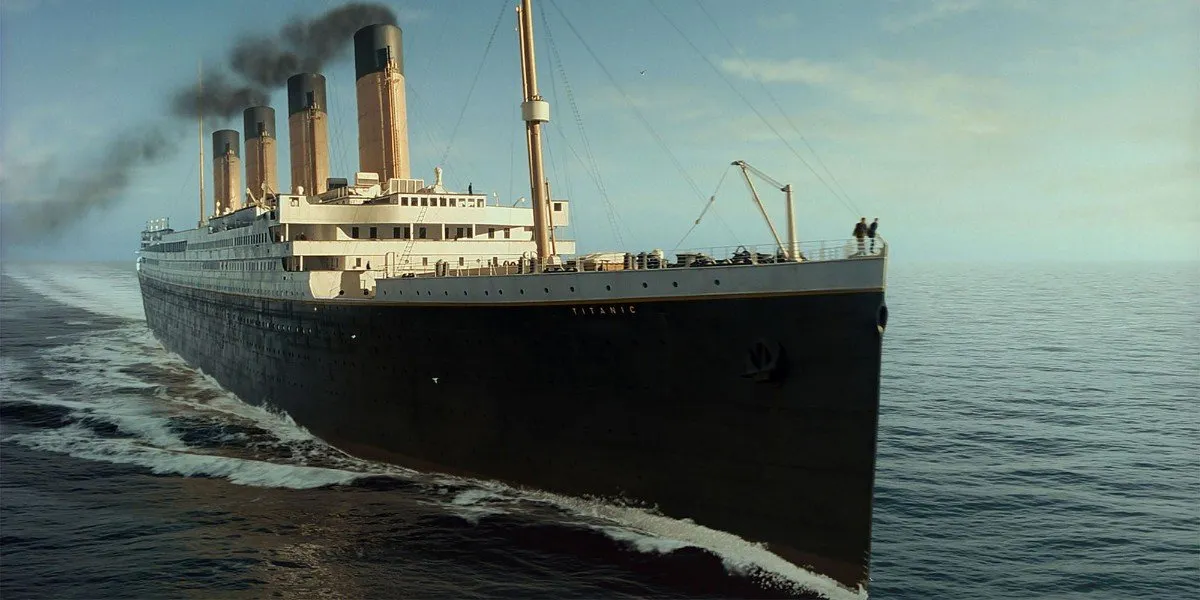

# Predict the survival rate of passenger based on its Pclass , age, sex and fare from titanic.csv also some data has no value also take care of that,


In [302]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE
from sklearn import tree


In [303]:
url = 'https://raw.githubusercontent.com/ManishMadhavan3008/ML_Exercise/main/5_DecisionTree/titanic.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [304]:
# after that drop data which is not required
inputs = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns')





In [305]:
target = df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [306]:
# cleaning data for Age colum
import math
mean = math.floor(inputs['Age'].mean())
print(mean)
#mean= 78
inputs['Age'] = inputs['Age'].fillna(mean)
print(inputs.Age)

29
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [307]:
#Label encoding of Sex Male and Female
le_Sex = LE()
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
print(inputs)

     Pclass     Sex   Age     Fare  Sex_n
0         3    male  22.0   7.2500      1
1         1  female  38.0  71.2833      0
2         3  female  26.0   7.9250      0
3         1  female  35.0  53.1000      0
4         3    male  35.0   8.0500      1
..      ...     ...   ...      ...    ...
886       2    male  27.0  13.0000      1
887       1  female  19.0  30.0000      0
888       3  female  29.0  23.4500      0
889       1    male  26.0  30.0000      1
890       3    male  32.0   7.7500      1

[891 rows x 5 columns]


In [308]:
#drop
inputs_n = inputs.drop(['Sex'], axis = 'columns')
inputs_n

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,29.0,23.4500,0
889,1,26.0,30.0000,1


In [309]:
# we can make split data vs training also
from sklearn.model_selection import train_test_split as TT
X= inputs_n[['Pclass','Age','Fare','Sex_n']]
y= target
#X_train, x_test,Y_train,y_test = TT(X,y,test_size=0.2,random_state =10)
X_train, x_test,Y_train,y_test = TT(X,y,test_size=0.2)



In [310]:
model = tree.DecisionTreeClassifier()

In [311]:
# here we have completed our dataset now we need  to take some decisions using decision tree
# we have our inputs as inputs_n and target




In [312]:
#model.fit(inputs_n,target)

In [313]:

# Pclass =1
# Age	=20
# Fare =  50
# #Sex =0 #female
# Sex =1 #male
# val= model.predict([[Pclass,	Age,	Fare, Sex]])
# print(val)
# if(val == 0):
#   print("Not survived")
# else:
#   print("Survived")



In [314]:
model.fit(X_train,Y_train)
pr = model.predict(x_test[:5])
print(pr)
print(y_test[:5])


[0 1 0 0 1]
757    0
691    1
414    1
550    1
369    1
Name: Survived, dtype: int64


In [315]:
model.score(x_test, y_test)

0.7821229050279329